In [1]:
%pylab inline
import os
import seaborn as sns
import pickle as pkl
pal = sns.color_palette('Blues')
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
#sns.set(color_codes=True)
from scipy.stats import gaussian_kde
import pandas as pd
from eod import stations_cc
from scipy.stats.stats import pearsonr
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
dic40 = stations_cc.readStation(40)
dic60 = stations_cc.readStation(60)
dic70 = stations_cc.readStation(70)

In [3]:
alog = dic40['area']
log=np.log10(alog)
drain = dic40['rain']
drain25 = drain[dic40['area']>25000]
Tmin25 = dic40['minT'][dic40['area']>25000]

thresh = np.squeeze(dic40['thresh'])
rthresh = np.array([thresh]*500).transpose()
nthresh = rthresh[dic40['area']>25000]

ok = np.where(~np.isnan(drain))
drain=drain[ok]
alog = alog[ok]
log = log[ok]
dthresh = rthresh.copy()[ok]

nok = np.where(np.isfinite(log))
drain=drain[nok]
alog = alog[nok]
#log[nok]=0.
log = log[nok]
dthresh = dthresh[nok]

In [4]:
myDicts = pkl.load( open ('/users/global/cornkle/data/OBS/MSG_TRMM_temp_pcp_300px2004-2013_new.p', 'rb'))

In [5]:
dic=myDicts[0]
p=np.array(dic['pp']) # 98th perc per MCS
t=np.array(dic['t'])  #mean T
print('Number MCSs:', p.size)
print('98th perc:', np.nanmean(np.array(dic['perc'])))
pc = p[p<81]
tm = t[p<81]

Number MCSs: 1640
98th perc: 29.5575427559


In [21]:
r=pearsonr(pc,tm)
print(r[0]**2)

0.160516181624


In [63]:
i=np.array([-40, -50, -60, -70, -80, -90])
i2 = i-10
tprob = []
for ii, ii2 in zip(i, i2):
    print(ii, ii2)
    pos = np.where((Tmin25 <= ii) & (Tmin25 >= ii2))
    nex= np.sum(drain25>nthresh)
    ptresh = drain25[pos]
    ttresh = nthresh[pos]
    prob=np.sum(ptresh>ttresh)/nex#/ptresh.size
    print(prob*100)
    tprob.append(prob*100.)

-40 -50
1.53846153846
-50 -60
2.85714285714
-60 -70
9.67032967033
-70 -80
41.0989010989
-80 -90
49.6703296703
-90 -100
3.2967032967


In [64]:
pos = np.where(drain>dthresh)
aarea = alog[pos]
prob = aarea[aarea>=25000].size/aarea.size
print(prob*100.)

95.78947368421052


[  3.3  49.7  41.1   9.7   2.9   1.5]


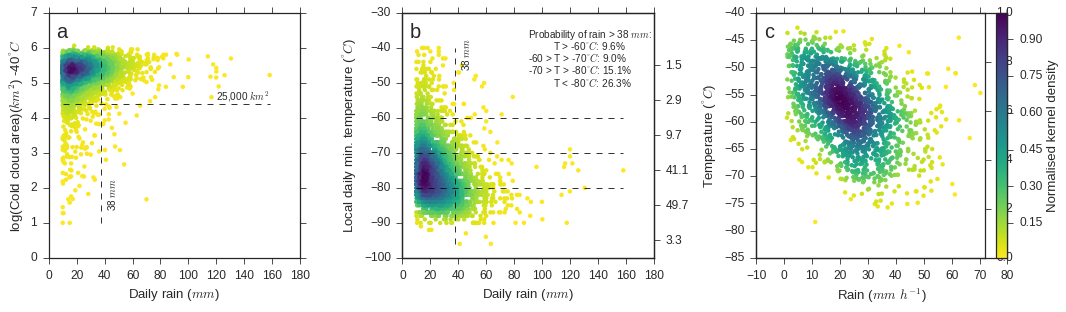

In [68]:
path = '/users/global/cornkle/C_paper/figs/'
fig = plt.figure(figsize=(15, 4.5), dpi=400)

ax1 = fig.add_subplot(131)

xy = np.vstack([drain,log])
z = gaussian_kde(xy)(xy)
test = z / (z.max() - z.min())
mappable = ax1.scatter(drain, log, c=test, edgecolor='', cmap='viridis_r')
c = 0.8
ax1.set_xlabel('Daily rain ($mm$)')
ax1.set_ylabel('log(Cold cloud area)($km^{2}$) -40$^{\degree}C$')
ax1.hlines(np.log10(25000), np.min(drain), np.max(drain), linestyles='dashed', label='25,000 $km^{2}$', linewidth=c)
ax1.vlines(np.mean(thresh), np.min(log), np.max(log), linestyles='dashed', label='threshold', linewidth=c)
#ax1.set_title('$98^{th}$ perc Pcp  vs meanT per MCS')
#cbar = fig.colorbar(mappable)
#cbar.set_label('Normalised probability density')
text(0.03, 0.9, 'a', transform=ax1.transAxes, fontsize=20)
#text(0.5, 0.35, 'Probability of rain > 38 $mm$:', transform=ax1.transAxes, fontsize=10)
#text(0.5, 0.3, 'Area > 25,000 $km^{2}$: 17.5%', transform=ax1.transAxes, fontsize=10)
text(120, 4.5, '25,000 $km^{2}$',  fontsize=10)
text(41, 2, '38 $mm$',  fontsize=10, rotation=90)

######################
ax1 = fig.add_subplot(132)

xy = np.vstack([drain25,Tmin25])
z = gaussian_kde(xy)(xy)
test = z / (z.max() - z.min())
mappable = ax1.scatter(drain25, Tmin25, c=test, edgecolor='', cmap='viridis_r')
ax1.set_xlabel('Daily rain ($mm$)')
ax1.set_ylabel('Local daily min. temperature ($^{\degree}C$)')
ax1.vlines(np.mean(thresh), np.min(Tmin25), np.max(Tmin25), linestyles='dashed', label='threshold', linewidth=c)
ax1.hlines(np.mean(-60), np.min(drain25), np.max(drain25), linestyles='dashed', label='threshold', linewidth=c)
ax1.hlines(np.mean(-70), np.min(drain25), np.max(drain25), linestyles='dashed', label='threshold', linewidth=c)
ax1.hlines(np.mean(-80), np.min(drain25), np.max(drain25), linestyles='dashed', label='threshold', linewidth=c)
ax1.hlines(np.mean(-90), np.min(drain25), np.max(drain25), linestyles='dashed', label='threshold', linewidth=c)
ax2 = ax1.twinx()
print(np.round(np.array(list(reversed(tprob))),decimals=1))
ax2.set_ylim((-100, -30))
ax2.set_yticks([-95, -85, -75, -65, -55, -45])
ax2.set_yticklabels(np.round(np.array(list(reversed(tprob))),decimals=1))
ax2.set_ylabel()
text(0.03, 0.9, 'b', transform=ax1.transAxes, fontsize=20)
text(0.5, 0.9, 'Probability of rain > 38 $mm$:', transform=ax1.transAxes, fontsize=10)
text(0.6, 0.85, 'T > -60$^{\degree}C$: 9.6%', transform=ax1.transAxes, fontsize=10)
text(0.5, 0.8, '-60 > T > -70$^{\degree}C$: 9.0%', transform=ax1.transAxes, fontsize=10)
text(0.5, 0.75, '-70 > T > -80$^{\degree}C$: 15.1%', transform=ax1.transAxes, fontsize=10)
text(0.6, 0.7, 'T < -80$^{\degree}C$: 26.3%', transform=ax1.transAxes, fontsize=10)
text(41, -40, '38 $mm$',  fontsize=10, rotation=90)
    #####################################

ax1 = fig.add_subplot(133)
xy = np.vstack([pc,tm])
z = gaussian_kde(xy)(xy)
test = z / (z.max() - z.min())
mappable = ax1.scatter(pc, tm, c=test, edgecolor='', cmap='viridis_r')
ax1.set_xlabel('Rain ($mm\ h^{-1}$)')
ax1.set_ylabel('Temperature ($^{\degree}C$)')
ax2=ax1.twinx()

#ax1.set_title('$98^{th}$ perc Pcp  vs meanT per MCS')
text(0.03, 0.9, 'c', transform=ax1.transAxes, fontsize=20)



from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
plt.colorbar(mappable, cax=cax, label='Normalised kernel density')


plt.tight_layout()
#plt.savefig(path+'station_TRMM_scatter.png')
#plt.savefig(path+'station_TRMM_scatter.eps')